<a href="https://colab.research.google.com/github/yurifillippo/Analises-Exploratorias-e-Python/blob/master/Fraude_de_Cart%C3%A3o_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

#Importar bibliotecas de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
#Importar dataset e ver tamanho
df = pd.read_csv('/content/drive/MyDrive/Competições Kagle/Fraude de Cartão de Crédito/creditcard.csv')
print('Variáveis: {} Entradas: {}'.format(df.shape[1], df.shape[0]))
df.head()

Variáveis: 31 Entradas: 284807


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


***Dicionário de Variáveis***

**Time** - Número de segundos decorridos entre esta transação e a primeira transação no conjunto de dados.

**V1 até V28** - Resultado de um PCA Dimensional

**Amount** - Montante (Valor R$)

**Class** - O valor 1 é para transações fraudulentas, o valor 0 é para transações não fraudulentas

**Análise Exploratória e preparação dos dados**

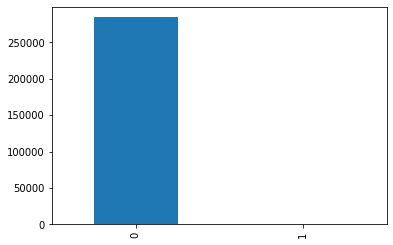

In [ ]:
#Ver distribuição da variável alvo no dataset
df['Class'].value_counts().plot(kind='bar');

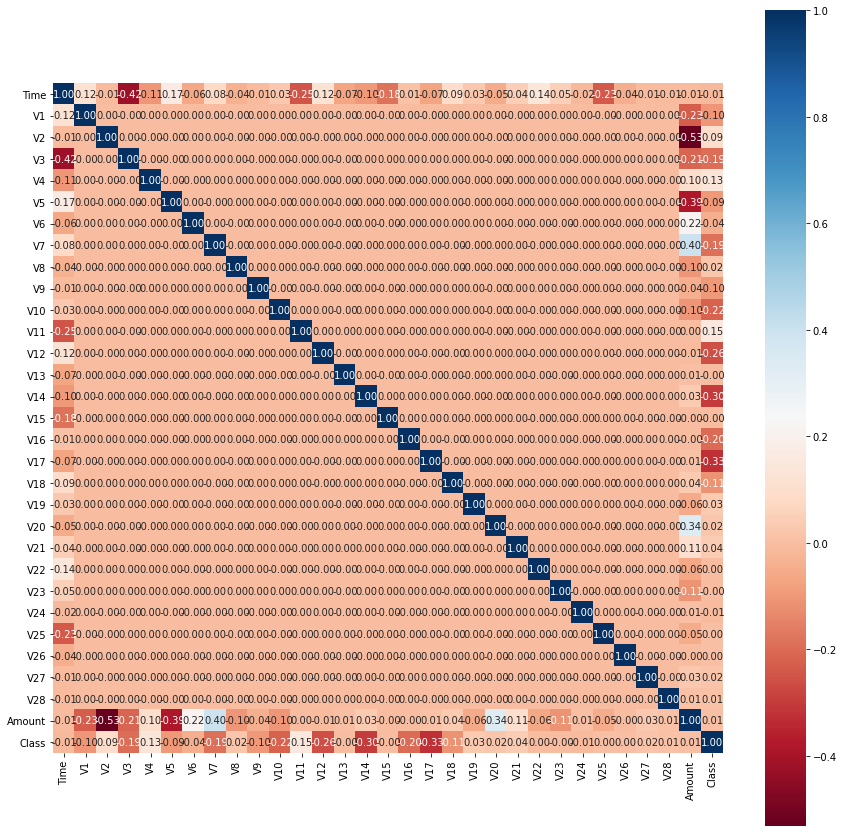

In [ ]:
#Criar correlação
corr = df.corr()
#Plotar figure
fig, ax = plt.subplots(figsize=(15,15))
#Plotar heatmap de correlações antes
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True, ax=ax);

In [ ]:
#Criar cópia do dataset
dfcopy = df.copy()

In [ ]:
dfcopy.drop(['V28', 'V27', 'V26', 'V25', 'V24', 'V8','V9'], axis=1, inplace=True)
#dfcopy.drop(['V28', 'V27', 'V26', 'V25', 'V24', 'V8','V9', 'V5'], axis=1, inplace=True)

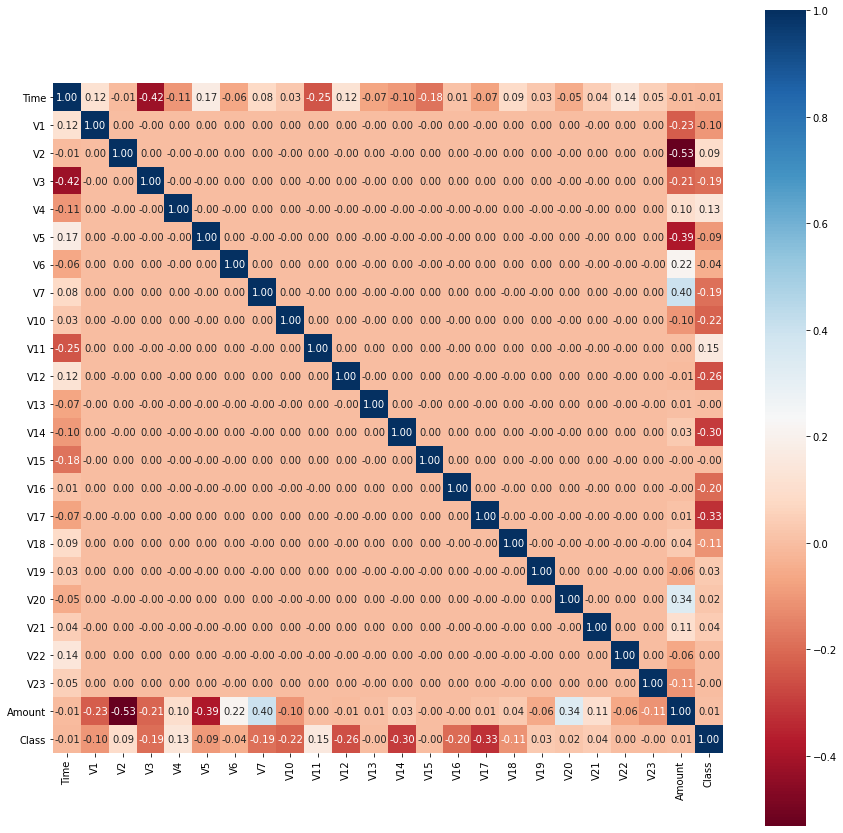

In [ ]:
#Criar correlação
corr = dfcopy.corr()
#Plotar figure
fig, ax = plt.subplots(figsize=(15,15))
#Plotar heatmap de correlações depois
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True, ax=ax);

**Dividir dataset entre Treino e Teste**

1    251
0    251
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


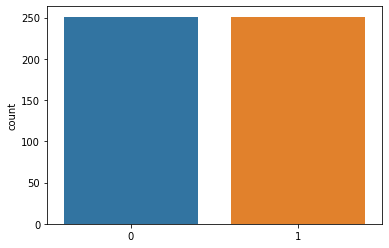

In [ ]:
#Dividir dataset entre treino e teste
X = dfcopy[['V2','V3', 'V7', 'V10', 'V12', 'V14', 'V17','Amount', 'V20', 'Time', 'V11']]
y = dfcopy['Class']

#Dividir entre treino e teste
np.random.seed(2)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)

# usar técnica under-sampling para balancear os dados, nesta técnica iremos manter nossos dados de minoria, e iremos colher a mesma quantidade de dados da maioria
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)


# balancear dados de treino
rus = RandomUnderSampler()
X_rustest, y_rustest = rus.fit_sample(X_test, y_test)
X_rustest = pd.DataFrame(X_rustest)


# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_rus);

In [ ]:
X_rustest

,0,1,2,3,4,5,6,7,8,9,10
0,-0.174124,1.330160,0.008813,-1.078147,-0.036679,-1.563129,1.132272,1.00,0.263479,51679.0,2.065578
1,-0.396445,1.894332,0.114246,0.484899,0.214700,-0.304348,-0.063758,57.22,-0.611000,74178.0,0.812645
2,0.016956,1.063610,-0.089253,-1.872954,0.337909,0.396551,0.637932,9.95,-0.443386,54473.0,-0.718216
3,0.756250,1.480050,-0.506405,-0.623662,0.467486,-0.090476,-0.617564,7.99,0.047580,80303.0,-0.789729
4,-1.137432,-0.143841,-1.020936,0.268370,-0.141838,0.087349,-1.395340,190.66,0.080206,139989.0,-0.537731
...,...,...,...,...,...,...,...,...,...,...,...
477,3.639654,-4.508498,-4.235253,-6.716720,-8.601648,-7.506169,-6.304753,1.00,0.500779,8614.0,6.353612
478,1.358367,-2.592844,-3.496197,-4.801637,-10.912819,-6.771097,-12.598419,59.00,-0.171608,6986.0,4.895844
479,12.785971,-9.906650,-18.750889,-5.052502,-4.610756,-9.072711,-6.248145,1.00,-3.493050,68207.0,4.406806
480,2.719882,-6.199070,-3.734902,-4.533515,-5.267205,-4.287996,-8.713920,127.14,0.319576,160895.0,2.288022


**Treinar modelo de ML**

In [ ]:
#Instanciar e treinar modelo
model = LogisticRegression()
model.fit(X_rustest, y_rustest)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Realizar previsão
y_pred = model.predict(X_rustest)

In [ ]:
# imprimir relatório de classificação
print(classification_report(y_rustest, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8872    0.9793    0.9310       241
           1     0.9769    0.8755    0.9234       241

    accuracy                         0.9274       482
   macro avg     0.9320    0.9274    0.9272       482
weighted avg     0.9320    0.9274    0.9272       482



In [ ]:
#Realizar previsão
y_pred2 = model.predict(X_test)

In [ ]:
# imprimir relatório de classificação
print(classification_report(y_test, y_pred2, digits=4))

              precision    recall  f1-score   support

           0     0.9998    0.9697    0.9845    142163
           1     0.0467    0.8755    0.0887       241

    accuracy                         0.9695    142404
   macro avg     0.5232    0.9226    0.5366    142404
weighted avg     0.9982    0.9695    0.9830    142404

